In [1]:
from generator_utils import generate_demand, generate_innovations, generate_phi, generate_theta, generate_sigma_U, simulate_arma22
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dimensions = 3

"""
generate the covariance matrix for the innovations U
- diagonal: increasing the scale_diagonal increases the variance of the innovations --> more volatile
- off-diagonal: increasing the scale_off_diagonal increases the correlation between the innovations --> more synchronized
"""
sigma_U = generate_sigma_U(num_dimensions=dimensions, scale_diagonal=0.05, scale_off_diagonal=0.05)

"""
Set up the AutoRegressive coefficents (AR) 

Influence: How much past values of the time series affect the current value.
- decrease: make data more random / unpredictable
- increase: make data more predictable
"""
Phi1, Phi2 = generate_phi(num_dimensions=dimensions, factor=1)
print(Phi1, Phi2)

"""
Set up the Moving Average coefficients (MA)

Influence: How much past error terms (unexpected shocks) affect the current value.
- increse: make data more dependent on past shocks/errors, make data more volatile
- decrease: less sensitve to shocks
"""
Theta1, Theta2 = generate_theta(num_dimensions=dimensions, factor=1)

# define the number of periods to simulate
n_periods = 1000000
# simulate the ARMA process
X = simulate_arma22(n_periods=n_periods, Phi1=Phi1, Phi2=Phi2, Theta1=Theta1, Theta2=Theta2, sigma_U=sigma_U, num_dimensions=dimensions)
print(X[50:55])
# generate the demand
Y = generate_demand(X=X[:,:3], n_periods=n_periods)



[[ 0.5 -0.9  0. ]
 [ 1.1 -0.7  0. ]
 [ 0.   0.   0.5]] [[ 0.  -0.5  0. ]
 [-0.5  0.   0. ]
 [ 0.   0.   0. ]]
[[-0.08394859 -0.47595685  0.16967006]
 [-0.01960298  0.00514184 -0.08009108]
 [-0.21153405  0.64438661 -0.17772816]
 [-0.66395046 -0.11720108 -0.21176141]
 [-0.29291338 -0.5647965  -0.10065437]]


In [3]:
print(X.shape, Y.shape)

df_target = pd.DataFrame(Y, columns=['Demand1', 'Demand2', 'Demand3', 'Demand4', 'Demand5', 'Demand6', 'Demand7', 'Demand8', 'Demand9', 'Demand10', 'Demand11', 'Demand12'])
df_features = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])#, 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9'])

variance_target = df_target.var()
print(variance_target)



(1000000, 3) (1000000, 12)


ValueError: Shape of passed values is (1000000, 12), indices imply (1000000, 3)

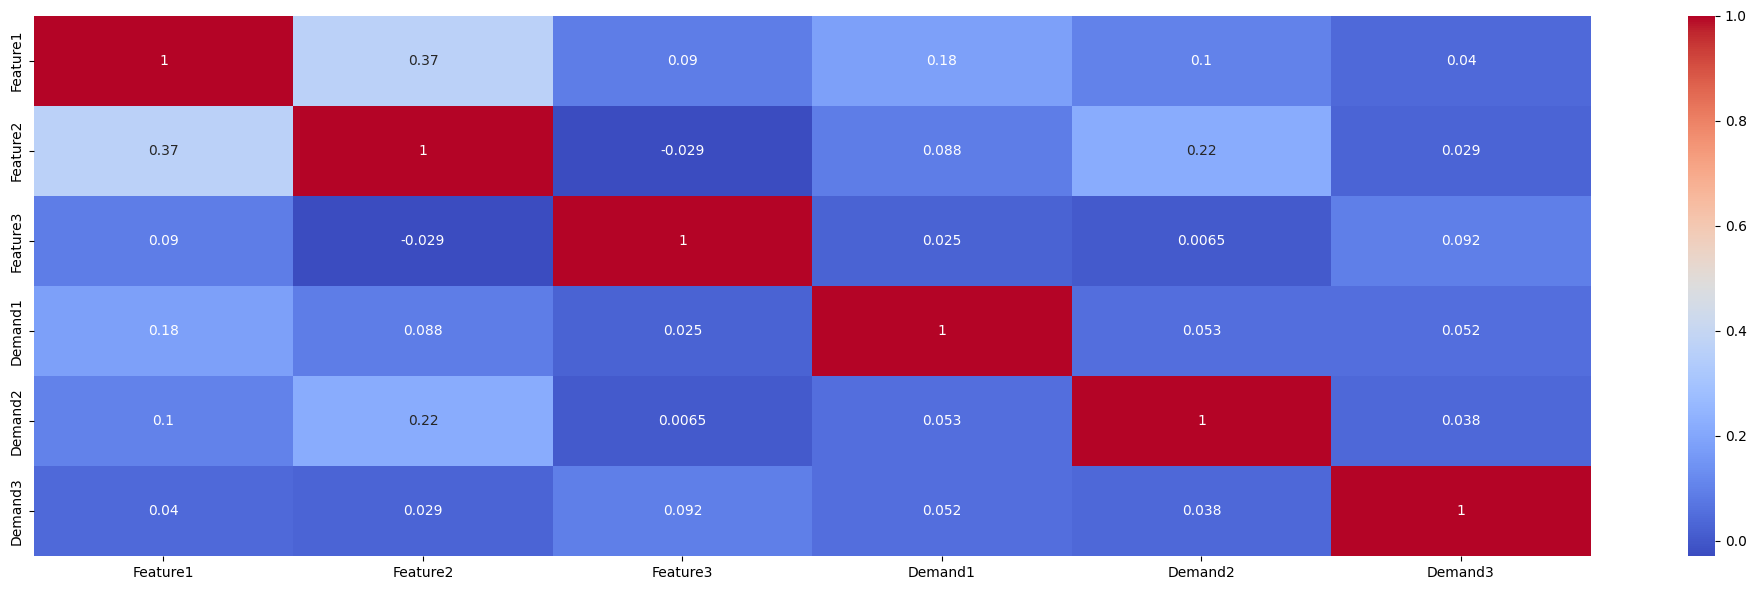

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_features is your DataFrame with features and df_demands is your DataFrame with demands
df1 = pd.concat([df_features, df_target], axis=1)


plt.figure(figsize=(20, 6))

# Plot the correlation heatmap for the combined dataframe
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

plt.tight_layout()
plt.show()

In [ ]:
epsilon = np.random.normal(0, 1, (n_periods, 12))
print(epsilon)

[[-0.48047478  0.72289054  0.10373905 ...  0.52343417  0.37308649
   1.12423639]
 [ 0.30679974 -0.32519799 -1.79929148 ...  0.88450247  0.7732391
   0.6527818 ]
 [-0.35961755 -0.53474133  0.75817786 ... -0.43627148 -0.56000153
   2.61884353]
 ...
 [-0.67960084  0.01391827 -1.0361512  ... -0.43979791 -2.10819075
  -0.17553463]
 [ 1.48740515  1.68668778  2.76213529 ... -0.62684284 -0.16737339
  -0.84483532]
 [ 1.12885771  2.75238528  0.62649378 ... -0.1542072   0.61009272
   1.63736511]]
